In [ ]:
from datasets import load_dataset

ds = load_dataset('billingsmoore/Aggregated-bo-en', split='train')
ds[0]

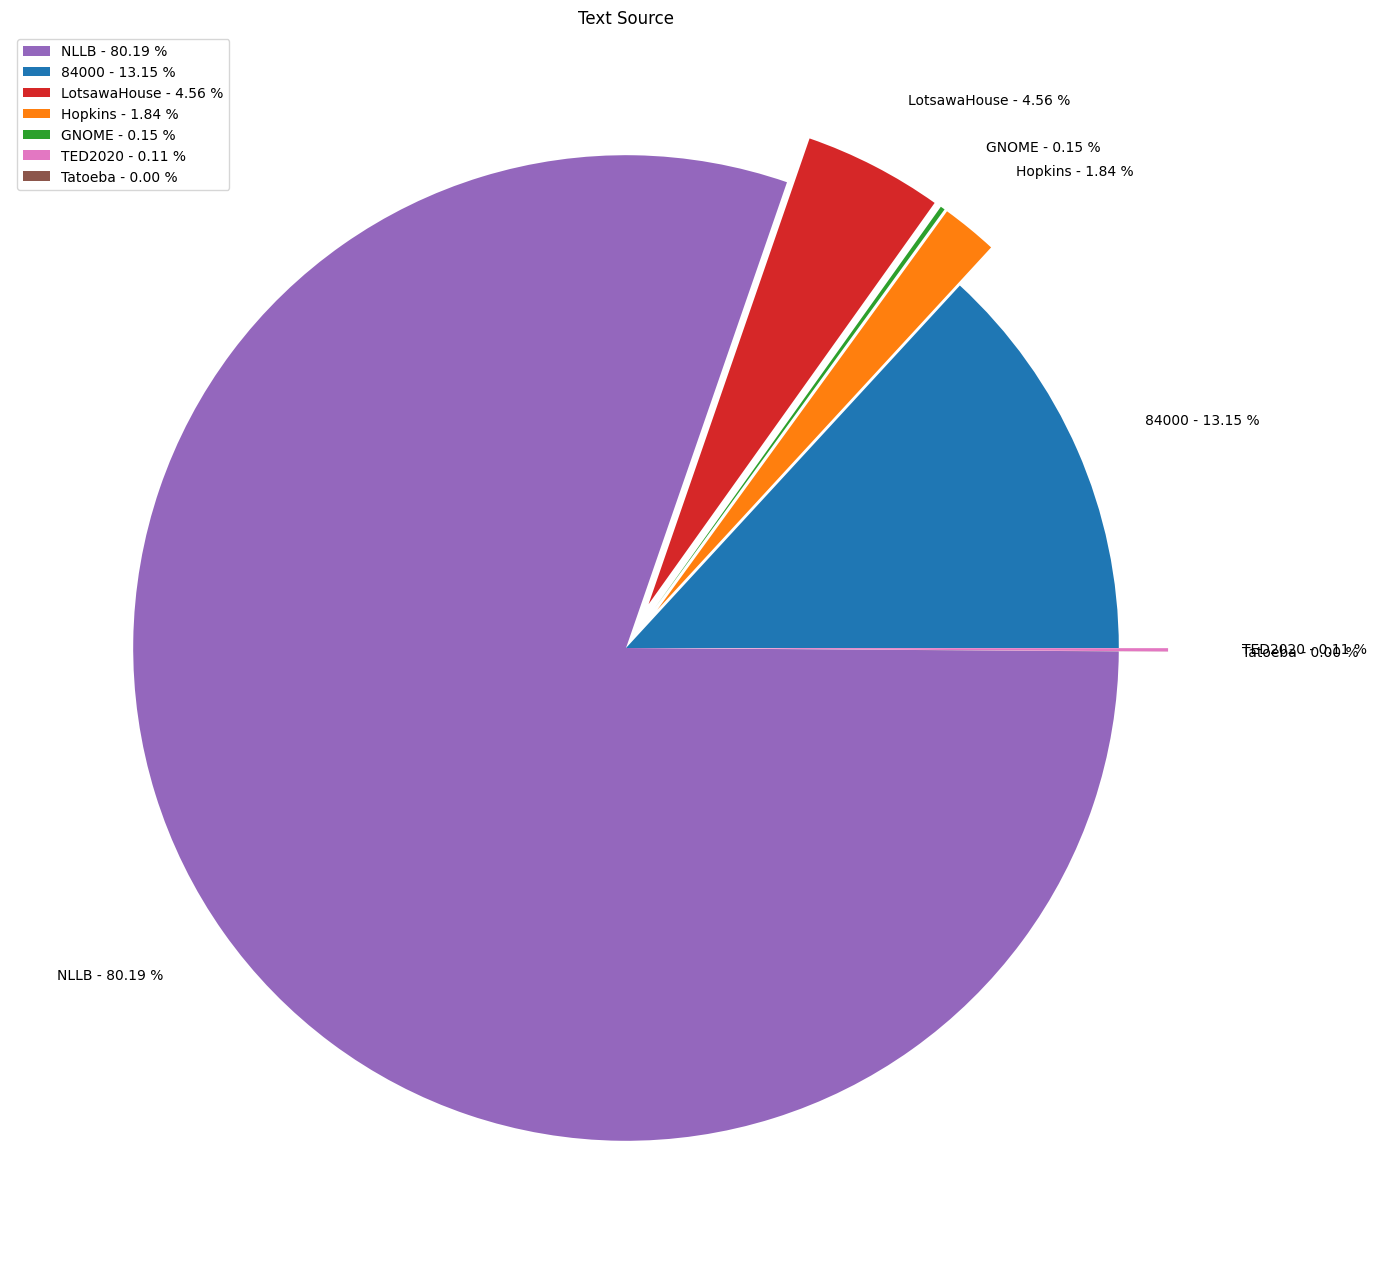

<Figure size 640x480 with 0 Axes>

In [54]:
import matplotlib.pyplot as plt
from collections import Counter

# Extract the 'source' column
sources = [source for source in ds['source']]

total = len(sources)

# Count the occurrences of each source
source_counts = Counter(sources)

# Prepare data for the pie chart
labels = list(source_counts.keys())
sizes = list(source_counts.values())

threshold = 5

# Calculate the explode values
explode = [0.1 if (count / total * 100) < threshold else 0 for count in source_counts.values()]
percents = [round(size/total,6)*100 for size in sizes]
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, percents)]

# Create the pie chart with explode
plt.figure(figsize=(16, 16))
patches, texts = plt.pie(sizes, labels=labels,labeldistance=1.15, explode=explode)
patches, labels, dummy =  zip(*sorted(zip(patches, labels, sizes),
                                          key=lambda x: x[2],
                                          reverse=True))
plt.title('Text Source')
plt.legend(patches, labels, loc='best')
plt.show()
plt.tight_layout()
